In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df.shape

(64461, 61)

In [20]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [21]:
df_schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')
df_schema.shape

(61, 2)

In [32]:
df_schema.head(30)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [33]:
df_schema.tail(31)

,Column,QuestionText
30,NEWJobHunt,"In general, what drives you to look for a new ..."
31,NEWJobHuntResearch,"When job searching, how do you learn more abou..."
32,NEWLearn,How frequently do you learn a new language or ...
33,NEWOffTopic,Do you think Stack Overflow should relax restr...
34,NEWOnboardGood,Do you think your company has a good onboardin...
35,NEWOtherComms,Are you a member of any other online developer...
36,NEWOvertime,How often do you work overtime or beyond the f...
37,NEWPurchaseResearch,"When buying a new tool or software, how do you..."
38,NEWPurpleLink,You search for a coding solution online and th...
39,NEWSOSites,Which of the following Stack Overflow sites ha...


In [60]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

<AxesSubplot:>

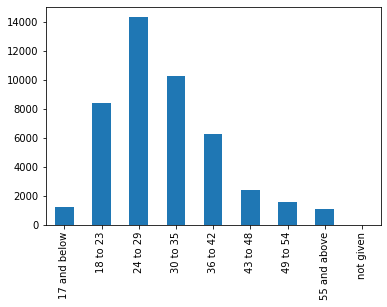

In [65]:
def groupAge(row):
    age = df['Age'][row]
    if np.isnan(age):
        return 'not given'
    elif age <= 17:
        return '17 and below'
    elif age <= 23:
        return '18 to 23'
    elif age <= 29:
        return '24 to 29'
    elif age <= 35:
        return '30 to 35'
    elif age <= 42:
        return '36 to 42'
    elif age <= 48:
        return '43 to 48'
    elif age <= 55:
        return '49 to 54'
    else:
        return '55 and above'

ages = df['Age'].groupby(groupAge).count()
ages.plot(kind='bar')

<AxesSubplot:>

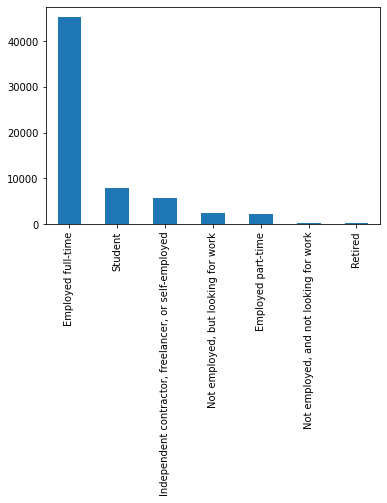

In [61]:
positions = df['Employment'].value_counts()
positions.plot(kind='bar')

In [66]:
types = df['DevType'].value_counts()
types.plot(kind='bar')

<AxesSubplot:>

Error in callback <function flush_figures at 0x000001A301929040> (for post_execute):


KeyboardInterrupt: 

In [68]:
df['DevType'].unique().shape

(8270,)